In [32]:
import pandas as pd
import numpy as np
from scipy import stats
from math import ceil
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import math
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
import sklearn
from sklearn.preprocessing import *
from sklearn.preprocessing import QuantileTransformer

In [33]:
sample = pd.read_csv('sample_submission.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [34]:
sample

,id,Weekly_Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
175,176,0
176,177,0
177,178,0
178,179,0


In [35]:
test
test.isnull().sum()

id                0
Store             0
Date              0
Temperature       0
Fuel_Price        0
Promotion1        2
Promotion2      135
Promotion3       19
Promotion4       34
Promotion5        0
Unemployment      0
IsHoliday         0
dtype: int64

In [36]:
train
train.isnull().sum()


id                 0
Store              0
Date               0
Temperature        0
Fuel_Price         0
Promotion1      4153
Promotion2      4663
Promotion3      4370
Promotion4      4436
Promotion5      4140
Unemployment       0
IsHoliday          0
Weekly_Sales       0
dtype: int64

<AxesSubplot:>

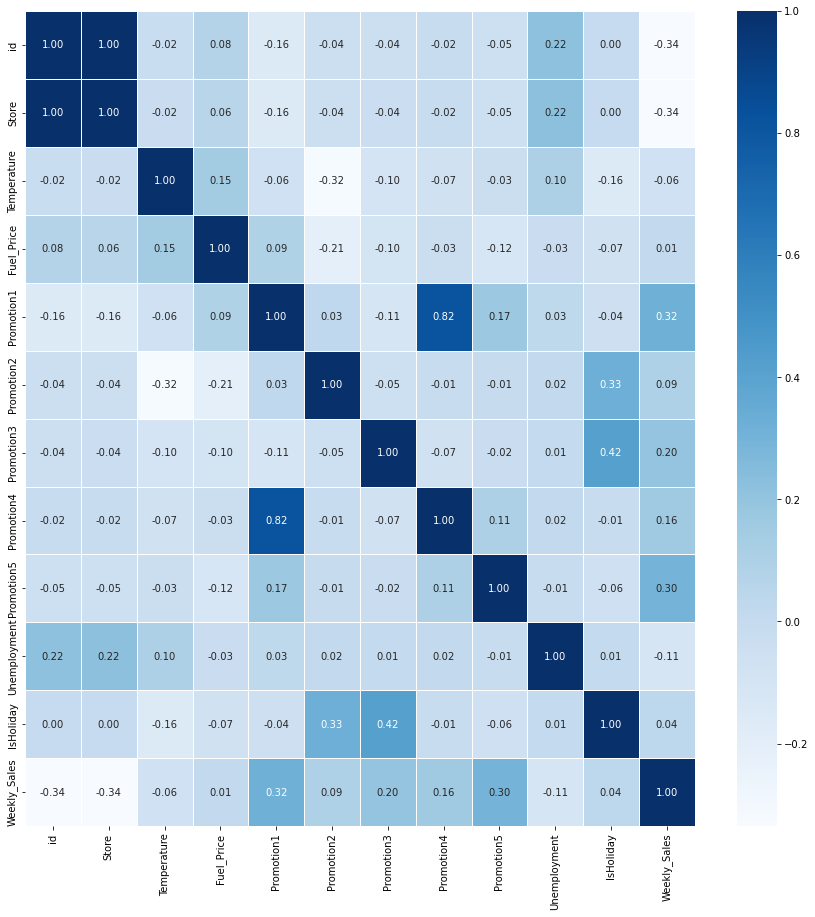

In [37]:
plt.figure(figsize=(15,15))
sns.heatmap(data = train.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

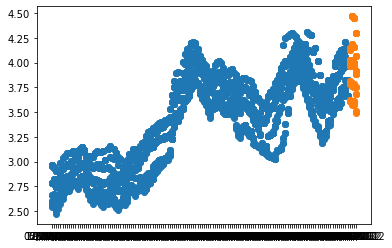

In [47]:
plt.scatter(train['Date'],train['Fuel_Price'])
plt.scatter(test['Date'],test['Fuel_Price'])

plt.show()

In [42]:
train[train['Unemployment']>=14]['Store'].unique()

array([12, 28, 38])

In [9]:
# date 에서 연도 칼럼, 월 칼럼, 일 칼럼 따로 분리 
def seperate_date(df):
    date=list(df['Date'])
    year=[]
    month=[]
    day=[]
    year_=''
    month_=''
    day_=''
    for j in date:
        list_=j.split("/")
        for i in range(3):
            if(i==0):
                day_+=list_[i]
            elif(i==1):
                month_+=list_[i]
            elif(i==2):
                year_+=list_[i]
        year.append(int(year_))
        month.append(int(month_))
        day.append(int(day_))
        year_=''
        month_=''
        day_=''
    df=df.drop(columns='Date')
    df['year']=year
    df['month']=month
    df['day']=day
    return df

In [10]:

train=seperate_date(train)
train = train.fillna(0)


        

In [11]:
list1=train[(train['Promotion1']==0.0)&(train['year']>2011)].index
for i in list1:
    train.at[i,'Promotion1']=train['Promotion1'].mean()
    
list2=train[(train['Promotion2']==0.0)&(train['year']>2011)].index
for i in list2:
    train.at[i,'Promotion2']=train['Promotion2'].mean()
    
list3=train[(train['Promotion3']==0.0)&(train['year']>2011)].index
for i in list3:
    train.at[i,'Promotion3']=train['Promotion3'].mean()
    
    
list4=train[(train['Promotion4']==0.0)&(train['year']>2011)].index
for i in list4:
    train.at[i,'Promotion4']=train['Promotion4'].mean()
    
list5=train[(train['Promotion5']==0.0)&(train['year']>2011)].index
for i in list5:
    train.at[i,'Promotion5']=train['Promotion5'].mean()

In [12]:

train["Weekly_Sales"] = np.log1p(train["Weekly_Sales"])
train["IsHoliday"] = train["IsHoliday"].astype(int)


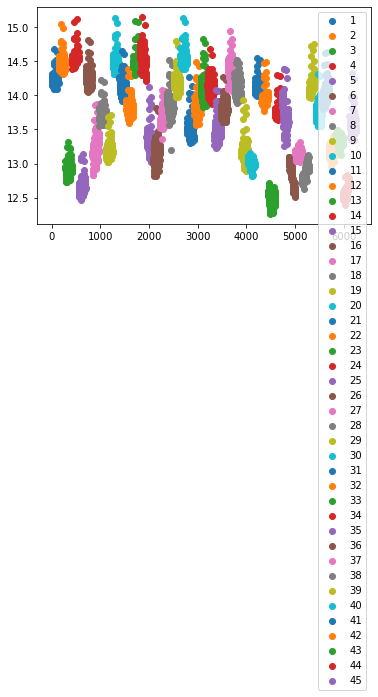

In [13]:
X=train['Store'].unique().tolist()

for i in X:
    Y=train[train['Store']==i]['Weekly_Sales']
    plt.scatter(Y.index,Y)
plt.legend(X)
plt.show()

In [14]:
store=train['Store'].unique().tolist()
#for i in store:
#    
#    c=train[train['Store']==i]
#    plt.figure(figsize=(15,15))
#    plt.title(i, fontsize=20)
#    sns.heatmap(data = c.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

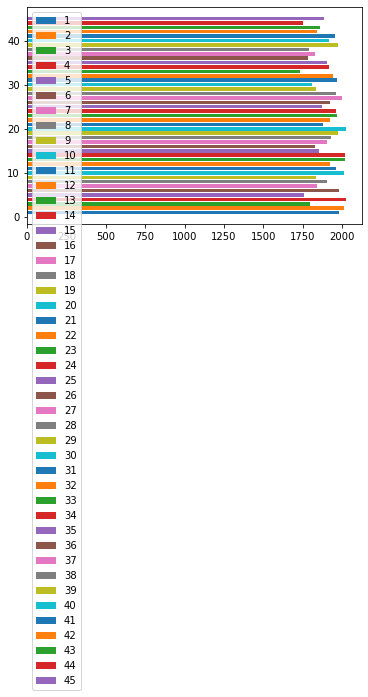

In [15]:
for i in store:
    c=train[train['Store']==i]
    y=c['Weekly_Sales'].sum()
    plt.barh(i,y)
    
plt.legend(store,loc='upper left')
plt.show()

<AxesSubplot:>

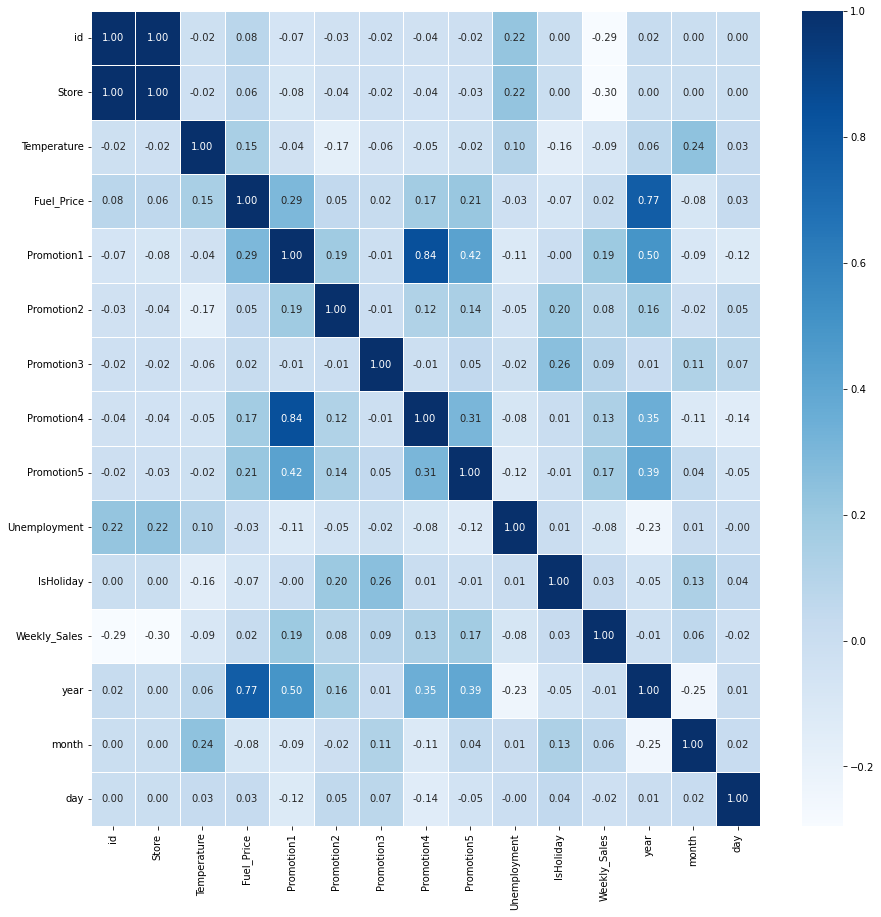

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(data = train.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

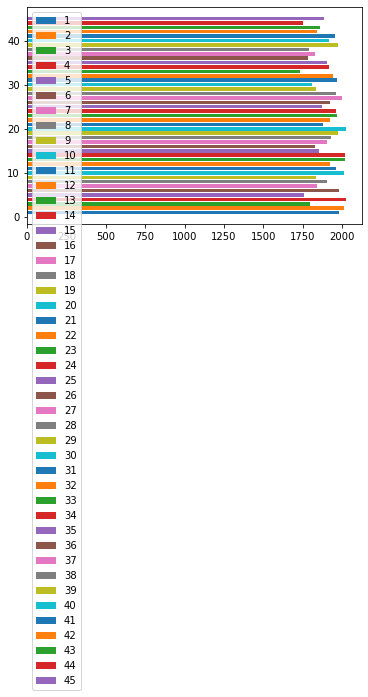

In [17]:
for i in store:
    c=train[train['Store']==i]
    y=c['Weekly_Sales'].sum()
    plt.barh(i,y)
    
plt.legend(store,loc='upper left')
plt.show()

In [18]:

train = pd.get_dummies(data = train,columns = ['Store'])
train=train.drop(columns=['id'])
train
#지점이 낮을때 값이 올라가는데 낮은 지점의 특징을 알아보자 그리고 프로모션도 알아보자

,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,42.31,2.572,0.00,0.000000,0.00,0.00,0.00,8.106,0,14.312455,...,0,0,0,0,0,0,0,0,0,0
1,38.51,2.548,0.00,0.000000,0.00,0.00,0.00,8.106,1,14.311400,...,0,0,0,0,0,0,0,0,0,0
2,39.93,2.514,0.00,0.000000,0.00,0.00,0.00,8.106,0,14.292967,...,0,0,0,0,0,0,0,0,0,0
3,46.63,2.561,0.00,0.000000,0.00,0.00,0.00,8.106,0,14.158908,...,0,0,0,0,0,0,0,0,0,0
4,46.50,2.625,0.00,0.000000,0.00,0.00,0.00,8.106,0,14.256862,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,75.09,3.867,23641.30,6.000000,92.93,6988.31,3992.13,8.684,0,13.506671,...,0,0,0,0,0,0,0,0,0,1
6251,75.70,3.911,11024.45,12.800000,52.63,1854.77,2055.70,8.684,1,13.549608,...,0,0,0,0,0,0,0,0,0,1
6252,67.87,3.948,11407.95,905.785698,4.30,3421.72,5268.92,8.684,0,13.462029,...,0,0,0,0,0,0,0,0,0,1
6253,65.32,4.038,8452.20,92.280000,63.24,2376.38,8670.40,8.684,0,13.491285,...,0,0,0,0,0,0,0,0,0,1


In [19]:
test=seperate_date(test)
test = test.fillna(test.mean())
test["IsHoliday"] = test["IsHoliday"].astype(int)
test = pd.get_dummies(data = test,columns = ['Store'])
test=test.drop(columns=['id'])
test

,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,year,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,68.55,3.617,8077.89,64.672,18.22,3617.430000,3626.14,6.573,0,2012,...,0,0,0,0,0,0,0,0,0,0
1,62.99,3.601,2086.18,64.672,8.11,602.360000,5926.45,6.573,0,2012,...,0,0,0,0,0,0,0,0,0,0
2,67.97,3.594,950.33,64.672,4.93,80.250000,2312.85,6.573,0,2012,...,0,0,0,0,0,0,0,0,0,0
3,69.16,3.506,2585.85,31.750,6.00,1057.160000,1305.01,6.573,0,2012,...,0,0,0,0,0,0,0,0,0,0
4,70.27,3.617,6037.76,64.672,10.04,3027.370000,3853.40,6.170,0,2012,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,46.97,3.755,38.65,2.610,0.98,1284.340068,457.74,5.217,0,2012,...,0,0,0,0,0,0,0,0,1,0
176,64.89,3.985,5046.74,64.672,18.82,2253.430000,2340.01,8.667,0,2012,...,0,0,0,0,0,0,0,0,0,1
177,54.47,4.000,1956.28,64.672,7.89,599.320000,3990.54,8.667,0,2012,...,0,0,0,0,0,0,0,0,0,1
178,56.47,3.969,2004.02,64.672,3.18,437.730000,1537.49,8.667,0,2012,...,0,0,0,0,0,0,0,0,0,1


In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 57 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Temperature   180 non-null    float64
 1   Fuel_Price    180 non-null    float64
 2   Promotion1    180 non-null    float64
 3   Promotion2    180 non-null    float64
 4   Promotion3    180 non-null    float64
 5   Promotion4    180 non-null    float64
 6   Promotion5    180 non-null    float64
 7   Unemployment  180 non-null    float64
 8   IsHoliday     180 non-null    int64  
 9   year          180 non-null    int64  
 10  month         180 non-null    int64  
 11  day           180 non-null    int64  
 12  Store_1       180 non-null    uint8  
 13  Store_2       180 non-null    uint8  
 14  Store_3       180 non-null    uint8  
 15  Store_4       180 non-null    uint8  
 16  Store_5       180 non-null    uint8  
 17  Store_6       180 non-null    uint8  
 18  Store_7       180 non-null    

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 58 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Temperature   6255 non-null   float64
 1   Fuel_Price    6255 non-null   float64
 2   Promotion1    6255 non-null   float64
 3   Promotion2    6255 non-null   float64
 4   Promotion3    6255 non-null   float64
 5   Promotion4    6255 non-null   float64
 6   Promotion5    6255 non-null   float64
 7   Unemployment  6255 non-null   float64
 8   IsHoliday     6255 non-null   int64  
 9   Weekly_Sales  6255 non-null   float64
 10  year          6255 non-null   int64  
 11  month         6255 non-null   int64  
 12  day           6255 non-null   int64  
 13  Store_1       6255 non-null   uint8  
 14  Store_2       6255 non-null   uint8  
 15  Store_3       6255 non-null   uint8  
 16  Store_4       6255 non-null   uint8  
 17  Store_5       6255 non-null   uint8  
 18  Store_6       6255 non-null 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 57 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Temperature   6255 non-null   float64
 1   Fuel_Price    6255 non-null   float64
 2   Promotion1    6255 non-null   float64
 3   Promotion2    6255 non-null   float64
 4   Promotion3    6255 non-null   float64
 5   Promotion4    6255 non-null   float64
 6   Promotion5    6255 non-null   float64
 7   Unemployment  6255 non-null   float64
 8   Weekly_Sales  6255 non-null   float64
 9   year          6255 non-null   int64  
 10  month         6255 non-null   int64  
 11  day           6255 non-null   int64  
 12  Store_1       6255 non-null   uint8  
 13  Store_2       6255 non-null   uint8  
 14  Store_3       6255 non-null   uint8  
 15  Store_4       6255 non-null   uint8  
 16  Store_5       6255 non-null   uint8  
 17  Store_6       6255 non-null   uint8  
 18  Store_7       6255 non-null 

In [22]:
#df_temp =train
#sns.pairplot(data=df_temp, diag_kind='hist')
#plt.show()

train=train.drop("IsHoliday",axis=1)
test=test.drop("IsHoliday",axis=1)

In [23]:
from sklearn.preprocessing import RobustScaler


promos = ['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5']

scaler = RobustScaler()
scaler.fit(train[promos])
train[promos] = scaler.transform(train[promos])
test[promos] = scaler.transform(test[promos])

In [24]:
from lightgbm import LGBMRegressor, LGBMClassifier

In [25]:
import xgboost
from xgboost import XGBRegressor
from xgboost import XGBRegressor as model

y = train['Weekly_Sales']
x= train.drop('Weekly_Sales',axis =1)
model = XGBRegressor(objective='reg:squarederror',learning_rate=0.1,max_depth = 4, n_estimators = 1000)
model.fit(x, y)
pred = model.predict(test)      
pred = pd.DataFrame(pred, columns=['Weekly_Sales'])
pred = np.expm1(pred)
pred


,Weekly_Sales
0,1.700348e+06
1,1.563632e+06
2,1.470604e+06
3,1.521204e+06
4,1.944742e+06
...,...
175,3.618164e+05
176,7.739502e+05
177,7.303989e+05
178,7.179034e+05


In [26]:
lgbm = LGBMRegressor(random_state=42, learning_rate=0.01, n_estimators=1500, colsample_bytree=0.9, num_leaves=15, subsample=0.8)
lgbm.fit(x, y)
lgbm_pred = lgbm.predict(test)
lgbm_pred = pd.DataFrame(lgbm_pred, columns=['Weekly_Sales'])
lgbm_pred=np.expm1(lgbm_pred)
lgbm_pred




,Weekly_Sales
0,1.567283e+06
1,1.456120e+06
2,1.402600e+06
3,1.479456e+06
4,1.844361e+06
...,...
175,3.225196e+05
176,7.685404e+05
177,7.465730e+05
178,7.278903e+05


In [27]:
final=(lgbm_pred+pred)/2

In [28]:
final


,Weekly_Sales
0,1.633815e+06
1,1.509876e+06
2,1.436602e+06
3,1.500330e+06
4,1.894552e+06
...,...
175,3.421680e+05
176,7.712453e+05
177,7.384860e+05
178,7.228969e+05


In [29]:
sample['Weekly_Sales'] = pred
sample
sample.to_csv('result7.18_6.csv',index=False)